In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# # ZFOURGE data
# reg = np.load('fits/zfourge_galaxy.npz', allow_pickle=True)
# qui = np.load('fits/zfourge_quiescent.npz', allow_pickle=True)
# sf = np.load('fits/zfourge_star_forming.npz', allow_pickle=True)

# CIGALE data
# agn_frac = np.load('fits/cigale_AGN.npz', allow_pickle=True)
# agn_frac_other = np.load('fits/cigale_AGN_varyflux.npz', allow_pickle=True)
# sf_frac = np.load('fits/cigale_SF.npz', allow_pickle=True)
# total_frac = np.load('fits/cigale_TOTAL.npz', allow_pickle=True)

# New ZFOURGE data
reg = np.load('fits/new_zfourge_all.npz', allow_pickle=True)
qui = np.load('fits/new_zfourge_qui.npz', allow_pickle=True)
sf = np.load('fits/new_zfourge_sf.npz', allow_pickle=True)

# New CIGALE data
total_frac = np.load('fits/new_cigale_total.npz', allow_pickle=True)
sf_frac = np.load('fits/new_cigale_sf.npz', allow_pickle=True)
# agn_frac = np.load('fits/new_cigale_agn.npz', allow_pickle=True)
agn_frac = np.load('fits/new_cigale_maxzf.npz', allow_pickle=True)
agn_frac_other = np.load('fits/new_cigale_agn_vary.npz', allow_pickle=True)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Cambria']
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cambria'
plt.rcParams['mathtext.it'] = 'Cambria:italic'
plt.rcParams['mathtext.bf'] = 'Cambria:bold'
plt.rcParams['axes.formatter.use_mathtext'] = True

export = False

### Luminosity Function

C:\Users\danie\AppData\Local\Temp\ipykernel_19432\3500690149.py:106: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='' if i == 1 else '', color='maroon', marker='s', markerfacecolor='none')
C:\Users\danie\AppData\Local\Temp\ipykernel_19432\3500690149.py:114: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='CIGALE AGN' if i == 1 else '', color='red', marker='s')
C:\Users\danie\AppData\Local\Temp\ipykernel_19432\3500690149.py:131: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', c

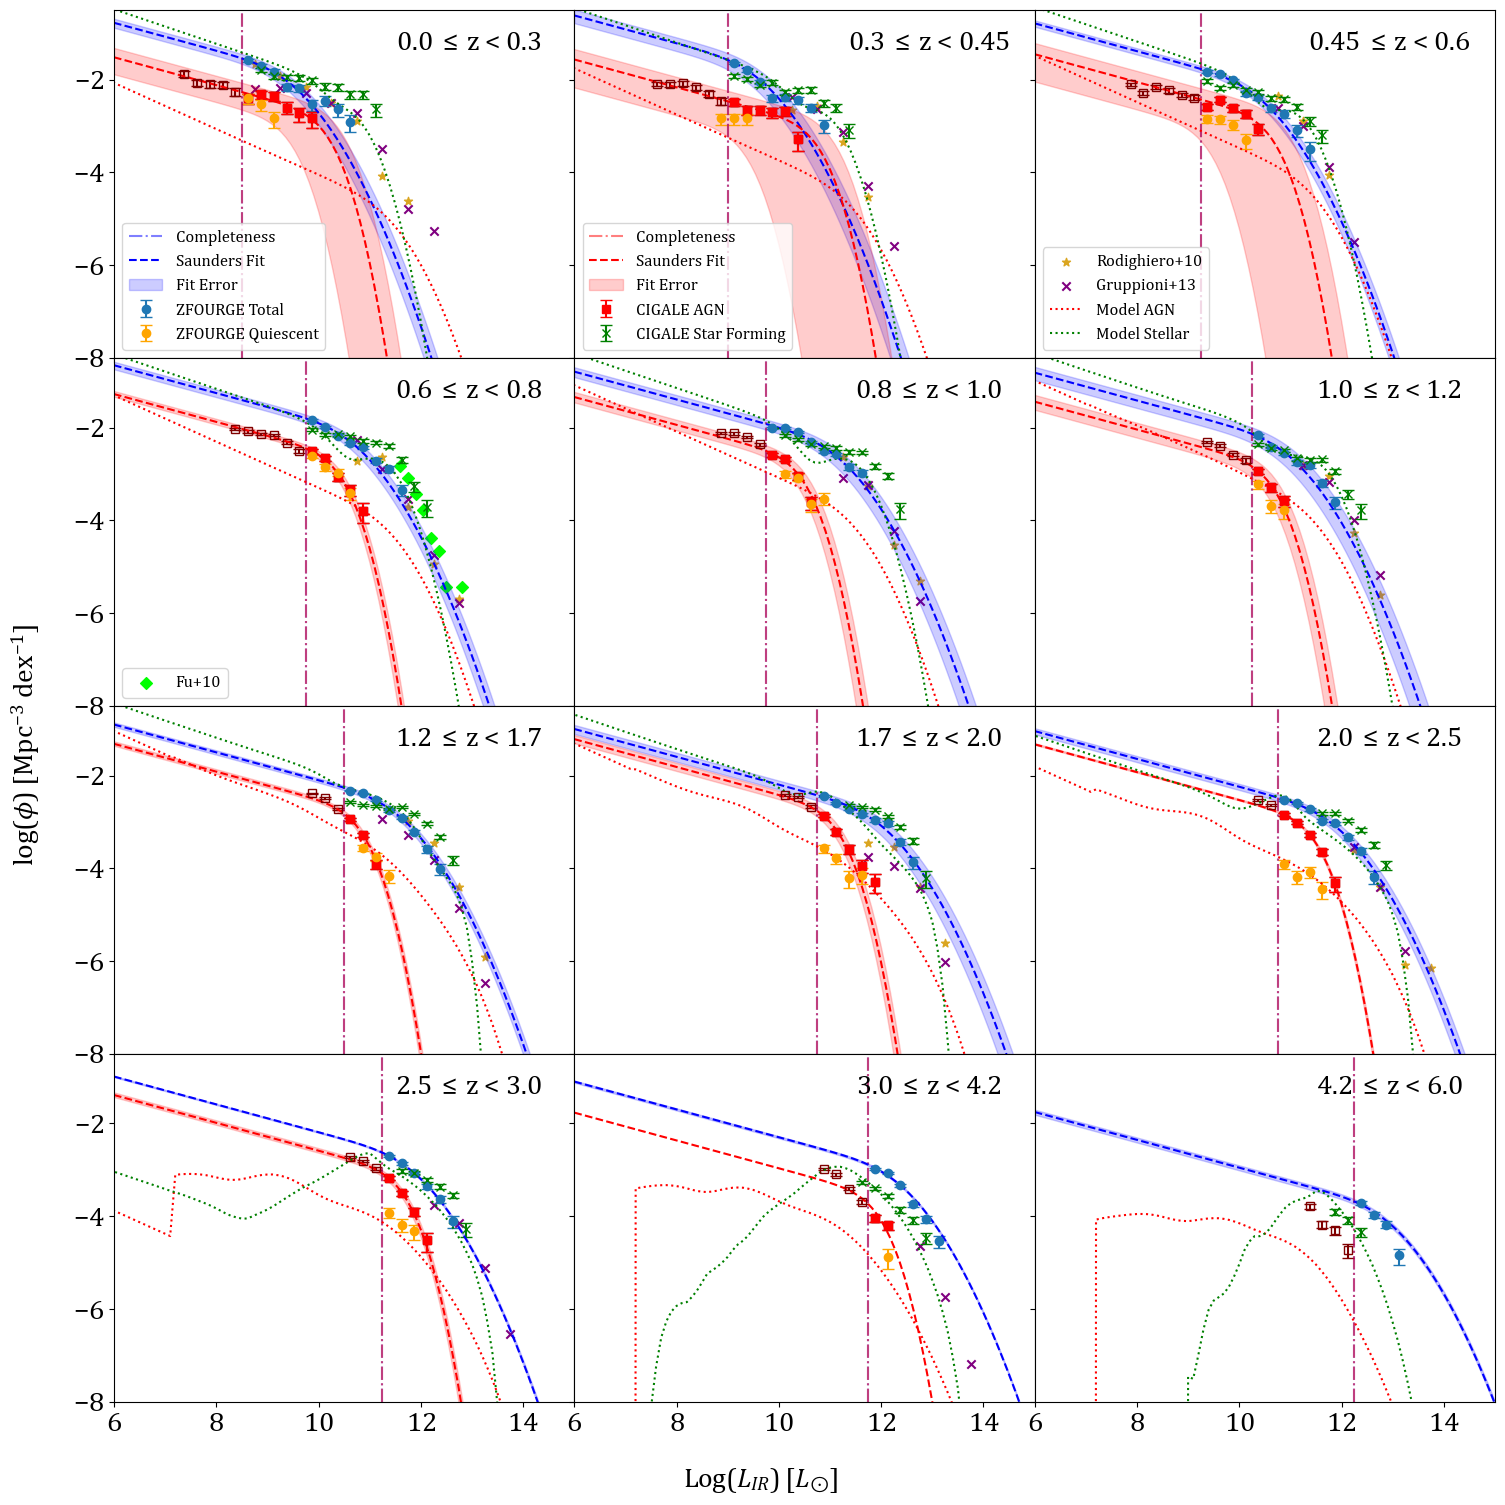

In [3]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

# def schechter_luminosity(L, L_star, phi_star):
#     return phi_star * (L / L_star) ** (1-1.2) * np.exp(-L / L_star)

# def saunders_luminosity(L, L_star, phi_star):
#     return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 0.7 ** 2) * (np.log10(1 + (L / L_star)))**2)

# def mid_saunders_luminosity(L, L_star, phi_star):
#     return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 0.9 ** 2) * (np.log10(1 + (L / L_star)))**2)

# def local_saunders_luminosity(L, L_star, phi_star):
#     return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 1.0 ** 2) * (np.log10(1 + (L / L_star)))**2)

# def first_saunders_luminosity(L, L_star, phi_star):
#     return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 1.1 ** 2) * (np.log10(1 + (L / L_star)))**2)

def cg_agn_saunders_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 0.3 ** 2) * (np.log10(1 + (L / L_star)))**2)

def zf_saunders_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 0.7 ** 2) * (np.log10(1 + (L / L_star)))**2)
        
# Rodighiero 
R_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75] # 0 < z < 0.3
R_L_04 =                   [10.25, 10.75, 11.25, 11.75] # 0.3 < z < 0.45
R_L_06 =                          [10.75, 11.25, 11.75] # 0.45 < z < 0.6
R_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
R_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
R_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
R_L_17 =                                        [11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
R_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
R_L_25 =                                               [12.25, 12.75, 13.25, 13.75] # 2 < z < 2.5
R_L = [R_L_03, R_L_04, R_L_06, R_L_08, R_L_10, R_L_12, R_L_17, R_L_20, R_L_25]

R_P_03 = [-1.67, -1.93, -2.17, -2.51, -2.90, -4.07, -4.61] # 0 < z < 0.3
R_P_04 =                      [-2.65, -2.56, -3.34, -4.52] # 0.3 < z < 0.45
R_P_06 =                             [-2.36, -2.89, -4.05] # 0.45 < z < 0.6
R_P_08 =                             [-2.72, -2.64, -3.72, -4.94, -5.7] # 0.6 < z < 0.8
R_P_10 =                                    [-2.64, -3.27, -4.54, -5.3] # 0.8 < z < 1.0
R_P_12 =                                    [-2.83, -3.05, -4.28, -5.6] # 1.0 < z < 1.2
R_P_17 =                                           [-2.97, -3.46, -4.4, -5.92] # 1.2 < z < 1.7
R_P_20 =                                           [-3.45, -3.54, -4.4, -5.61] # 1.7 < z < 2
R_P_25 =                                                  [-3.61, -4.4, -6.09, -6.15] # 2 < z < 2.5
R_P = [R_P_03, R_P_04, R_P_06, R_P_08, R_P_10, R_P_12, R_P_17, R_P_20, R_P_25]

# Gruppioni
G_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25] # 0.0 < z < 0.3
G_L_04 =                   [10.25, 10.75, 11.25, 11.75, 12.25] # 0.3 < z < 0.45
G_L_06 =                          [10.75, 11.25, 11.75, 12.25] # 0.45 < z < 0.6
G_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
G_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
G_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
G_L_17 =                                 [11.25, 11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
G_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
G_L_25 =                                               [12.25, 12.75, 13.25] # 2 < z < 2.5
G_L_30 =                                               [12.25, 12.75, 13.25, 13.75] # 2.5 < z < 3
G_L_42 =                                                      [12.75, 13.25, 13.75] # 3 < z < 4.2
G_L = [G_L_03, G_L_04, G_L_06, G_L_08, G_L_10, G_L_12, G_L_17, G_L_20, G_L_25, G_L_30, G_L_42]

G_P_03 = [-2.21, -2.18, -2.28, -2.50, -2.71, -3.49, -4.79, -5.27] # 0.0 < z < 0.3
G_P_04 =                      [-2.37, -2.64, -3.12, -4.29, -5.58] # 0.3 < z < 0.45
G_P_06 =                             [-2.61, -2.99, -3.89, -5.50] # 0.45 < z < 0.6
G_P_08 =                             [-2.27, -2.89, -3.53, -4.75, -5.79] # 0.6 < z < 0.8    
G_P_10 =                                    [-3.09, -3.24, -4.23, -5.74] # 0.8 < z < 1.0
G_P_12 =                                    [-2.80, -3.17, -4.00, -5.18] # 1.0 < z < 1.2
G_P_17 =                                    [-2.93, -3.29, -3.81, -4.85, -6.48] # 1.2 < z < 1.7
G_P_20 =                                           [-3.76, -3.96, -4.42, -6.01] # 1.7 < z < 2
G_P_25 =                                                  [-3.53, -4.40, -5.79] # 2 < z < 2.5
G_P_30 =                                                  [-3.75, -4.15, -5.11, -6.54] # 2.5 < z < 3
G_P_42 =                                                         [-4.65, -5.75, -7.18] # 3 < z < 4.2
G_P = [G_P_03, G_P_04, G_P_06, G_P_08, G_P_10, G_P_12, G_P_17, G_P_20, G_P_25, G_P_30, G_P_42]

# Rodighiero
for i, (ax, lum, phi) in enumerate(zip(axes, R_L, R_P)):
    ax.scatter(lum, phi, color='goldenrod', marker='*', label='Rodighiero+10' if i == 2 else '')
    
# Gruppioni
for i, (ax, lum, phi) in enumerate(zip(axes, G_L, G_P)):
    ax.scatter(lum, phi, color='purple', marker='x', label='Gruppioni+13' if i == 2 else '')

# Fu 0.6 < z < 0.8
axes[3].scatter(x=[11.60, 11.75, 11.90, 12.05, 12.20, 12.35, 12.50, 12.80], y=[-2.83, -3.08, -3.44, -3.78, -4.38, -4.66, -5.43, -5.43], label='Fu+10', marker='D', color='lime')

# This work
for i, (ax, l, p, e) in enumerate(zip(axes, reg['x'], reg['y'], reg['e'])):
    if len(p) == 0:
        continue
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='ZFOURGE Total' if i == 0 else '', color='C0')
    # ax.set_xticks([8,9,10,11,12,13,14])
    ax.set_xticks([4,6,8,10,12,14])
    ax.set_yticks([-8,-6,-4,-2])
    ax.tick_params(axis='both', labelsize=20)
    
# # Star Forming
# for i, (ax, l, p, e) in enumerate(zip(axes, sf['x'], sf['y'], sf['e'])):
#     yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
#     ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='Star Forming' if i == 1 else '', color='green')
    
# CIGALE AGN Other
for i, (ax, l, p, e) in enumerate(zip(axes, agn_frac_other['x'], agn_frac_other['y'], agn_frac_other['e'])):
    try:
        yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
        ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='' if i == 1 else '', color='maroon', marker='s', markerfacecolor='none')
    except TypeError:
        continue
    
# CIGALE AGN
for i, (ax, l, p, e) in enumerate(zip(axes, agn_frac['x'], agn_frac['y'], agn_frac['e'])):
    try:
        yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
        ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='CIGALE AGN' if i == 1 else '', color='red', marker='s')
    except TypeError:
        continue
    
# Quiescent
for i, (ax, l, p, e) in enumerate(zip(axes, qui['x'], qui['y'], qui['e'])):
    try:
        yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
        ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='ZFOURGE Quiescent' if i == 0 else '', color='orange')
    except TypeError:
        continue
        
# CIGALE Star Forming
for i, (ax, l, p, e) in enumerate(zip(axes, sf_frac['x'], sf_frac['y'], sf_frac['e'])):
    try:
        yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
        ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='CIGALE Star Forming' if i == 1 else '', color='green', marker='x')
    except TypeError:
        continue

# # CIGALE Total
# for i, (ax, l, p, e) in enumerate(zip(axes, total_frac['x'], total_frac['y'], total_frac['e'])):
#     try:
#         yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
#         ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='CIGALE Total' if i == 1 else '', color='cyan', marker='x')
#     except TypeError:
#         continue
    
# ZFOURGE Completeness limits
for i, (ax, min_l) in enumerate(zip(axes, reg['m'])):
    ax.axvline(min_l, color='blue', linestyle='-.', alpha=0.5, label='Completeness' if i == 0 else "")

# CIGALE AGN Completeness limits
for i, (ax, min_l) in enumerate(zip(axes, agn_frac['m'])):
    ax.axvline(min_l, color='red', linestyle='-.', alpha=0.5, label='Completeness' if i == 1 else "")

# ZFOURGE Saunders fits
l = np.logspace(6, 15, 100)
for i, (ax, params, perr, z) in enumerate(zip(axes, reg['saunder_p'], reg['saunder_e'], reg['z'])):
    if len(params) == 0:
        continue
    
    ax.plot(np.log10(l), np.log10(zf_saunders_luminosity(l, *params)), label='Saunders Fit' if i == 0 else "", color='blue', linestyle='--')
    p_up = params + perr
    p_down = np.abs(params - perr)
    ax.fill_between(np.log10(l), 
        np.log10(zf_saunders_luminosity(l, *p_down)), 
        np.log10(zf_saunders_luminosity(l, *p_up)), 
        color='blue', alpha=0.2, label='Fit Error' if i == 0 else "")
    ax.set_xlim(6, 15)
    ax.set_ylim(-8, -0.5)
    ax.set_title(f'{z[0]} $\leq$ z < {z[1]}', y=0.86, x=0.77, fontsize=20)
    
# AGN Saunders fits
for i, (ax, params, perr) in enumerate(zip(axes, agn_frac['saunder_p'], agn_frac['saunder_e'])):
    if len(params) == 0:
        continue
    ax.plot(np.log10(l), np.log10(cg_agn_saunders_luminosity(l, *params)), label='Saunders Fit' if i == 1 else "", color='red', linestyle='--')
    p_up = params + perr
    p_down = np.abs(params - perr)
    ax.fill_between(np.log10(l), 
        np.log10(cg_agn_saunders_luminosity(l, *p_down)), 
        np.log10(cg_agn_saunders_luminosity(l, *p_up)), 
        color='red', alpha=0.2, label='Fit Error' if i == 1 else "")

# Models
files = ['fits/LF_IR/LF_IR_z0.15.dat', 'fits/LF_IR/LF_IR_z0.35.dat', 'fits/LF_IR/LF_IR_z0.55.dat', 'fits/LF_IR/LF_IR_z0.70.dat',
         'fits/LF_IR/LF_IR_z0.90.dat', 'fits/LF_IR/LF_IR_z1.10.dat', 'fits/LF_IR/LF_IR_z1.50.dat', 'fits/LF_IR/LF_IR_z1.90.dat',
         'fits/LF_IR/LF_IR_z2.20.dat', 'fits/LF_IR/LF_IR_z2.80.dat', 'fits/LF_IR/LF_IR_z3.60.dat', 'fits/LF_IR/LF_IR_z5.00.dat']
for i, (file, ax) in enumerate(zip(files, axes)):
    df = pd.read_csv(file, comment='#', header=None, delim_whitespace=True)
    df.columns = ['log_LIR', 'Total', 'Warm_Starburst', 'Cold_Spiral', 'Type1_AGN', 
        'Type2_AGN', 'Stellar_Spheroids', 'AGN_Spheroids', 
        'Global_Spheroids', 'Lensed_Spheroids_Global']
    
    log_LIR = df['log_LIR']
    agn = 10**df['Type1_AGN'] + 10**df['Type2_AGN'] + 10**df['AGN_Spheroids']
    stellar = 10**df['Warm_Starburst'] + 10**df['Cold_Spiral'] + 10**df['Stellar_Spheroids']
    
    ax.plot(log_LIR, np.log10(agn), label='Model AGN' if i == 2 else "", color='red', linestyle='dotted')
    ax.plot(log_LIR, np.log10(stellar), label='Model Stellar' if i == 2 else "", color='green', linestyle='dotted')
    
axes[0].legend(loc='lower left', fontsize=12)
axes[1].legend(loc='lower left', fontsize=12)
axes[2].legend(loc='lower left', fontsize=12)
axes[3].legend(loc='lower left', fontsize=12)
fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0, fontsize=20)
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0, fontsize=20)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
if export:
    plt.savefig('bolo_lf.png')
plt.show()

### "This Work" One Plot

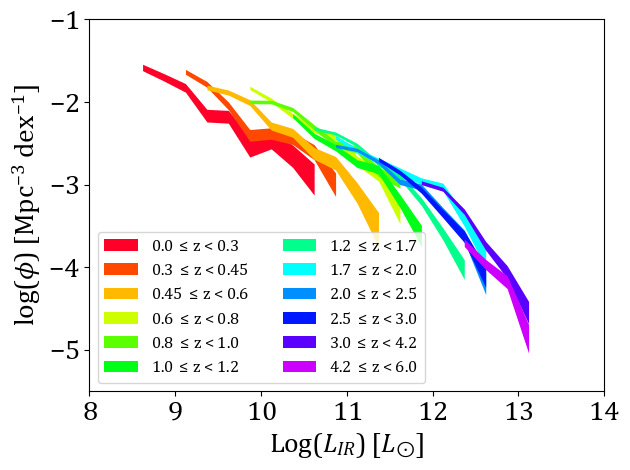

In [4]:
n = len(reg['x'])
cm = plt.get_cmap('gist_rainbow')
fig, ax = plt.subplots()
ax.set_prop_cycle(color=[cm(1.*i/n) for i in range(n)])

for i, (l, p, e, z) in enumerate(zip(reg['x'], reg['y'], reg['e'], reg['z'])):
    if len(p) == 0:
        continue
    p_down = np.log10(p - e)
    p_up = np.log10(p + e)
    ax.fill_between(l, p_down, p_up, label=f'{z[0]} $\leq$ z < {z[1]}')

plt.xlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0.05, fontsize=20)
plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0.05, fontsize=20)
plt.xlim(8, 14)
plt.ylim(-5.5, -1)
plt.yticks([-5,-4,-3,-2,-1], fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc='lower left', fontsize=12, ncol=2)
plt.tight_layout()
if export:
    plt.savefig('bolo_lf_fill.png')
plt.show()

### Parameter Evolution

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

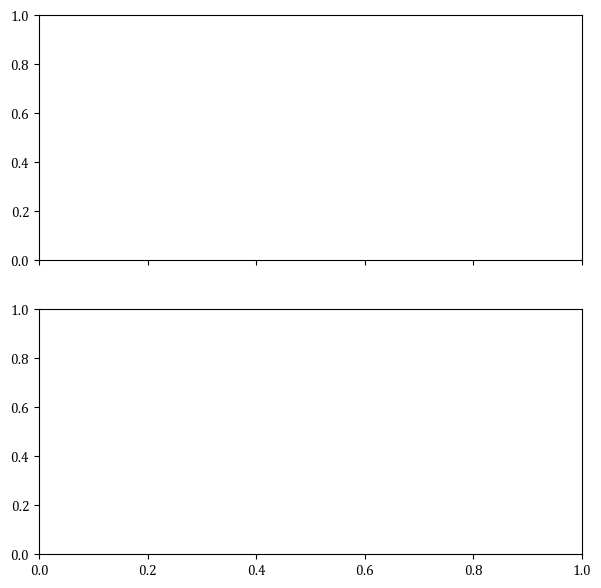

In [5]:
# Setup the figure and axis
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
z_centers = [(z[0] + z[1]) / 2 for z in reg['z']]
long_z = np.linspace(0, 5.5, 100)

def log_func(x, a, c):
    return a * np.log(x) + c

def fit_and_plot(axes, y, color):
    params, cov = curve_fit(log_func, z_centers, np.log10(y), p0=[max(y), max(y)])
    perr = np.sqrt(np.diag(cov))
    axes.plot(long_z, log_func(long_z, *params), linestyle='--', color=color)
    axes.fill_between(long_z, log_func(long_z, *(params - perr)), log_func(long_z, *(params + perr)), alpha=0.2, color=color)
    
def plot_data(axes, params, error, label, color):
    yerr=[np.log10(params) - np.log10(np.abs(params - error)), np.log10(params + error) - np.log10(params)]
    axes.errorbar(z_centers, np.log10(params), yerr=yerr, label=label, fmt='o', capsize=4, color=color)

# Lstar params
zfourge_Lstar_params = reg['saunder_p'][:,0].astype(float)
stellar_Lstar_params = sf_frac['saunder_p'][:,0].astype(float)
agn_Lstar_params = agn_frac['saunder_p'][:,0].astype(float)
total_Lstar_params = total_frac['saunder_p'][:,0].astype(float)

# Lstar error
zfourge_Lstar_err = reg['saunder_e'][:,0].astype(float)
stellar_Lstar_err = sf_frac['saunder_e'][:,0].astype(float)
agn_Lstar_err = agn_frac['saunder_e'][:,0].astype(float)
total_Lstar_err = total_frac['saunder_e'][:,0].astype(float)

# Lstar plot
plot_data(ax[0], zfourge_Lstar_params, zfourge_Lstar_err, 'ZFOURGE Bolometric', 'C0') # ZFOURGE plot
plot_data(ax[0], stellar_Lstar_params, stellar_Lstar_err, 'CIGALE Stellar', 'green') # Stellar plot
plot_data(ax[0], agn_Lstar_params, agn_Lstar_err, 'CIGALE AGN', 'red') # AGN plot
plot_data(ax[0], total_Lstar_params, total_Lstar_err, 'CIGALE Total', 'gold') # Total plot
fit_and_plot(ax[0], zfourge_Lstar_params, 'C0')
fit_and_plot(ax[0], stellar_Lstar_params, 'green')
fit_and_plot(ax[0], agn_Lstar_params, 'red')
fit_and_plot(ax[0], total_Lstar_params, 'gold')
ax[0].set_ylabel('log($L_{*}$) [$L_{\odot}$]')
ax[0].legend()
ax[0].set_xlim(0, 5.5)

# Phistar params
zfourge_phistar_params = reg['saunder_p'][:,1].astype(float)
stellar_phistar_params = sf_frac['saunder_p'][:,1].astype(float)
agn_phistar_params = agn_frac['saunder_p'][:,1].astype(float)
total_phistar_params = total_frac['saunder_p'][:,1].astype(float)

# Phistar error
zfourge_phistar_err = reg['saunder_e'][:,1].astype(float)
stellar_phistar_err = sf_frac['saunder_e'][:,1].astype(float)
agn_phistar_err = agn_frac['saunder_e'][:,1].astype(float)
total_phistar_err = total_frac['saunder_e'][:,1].astype(float)

# Phistar plot
plot_data(ax[1], zfourge_phistar_params, zfourge_phistar_err, 'ZFOURGE Bolometric', 'C0') # ZFOURGE plot
plot_data(ax[1], stellar_phistar_params, stellar_phistar_err, 'CIGALE Stellar', 'green') # Stellar plot
plot_data(ax[1], agn_phistar_params, agn_phistar_err, 'CIGALE AGN', 'red') # AGN plot
plot_data(ax[1], total_phistar_params, total_phistar_err, 'CIGALE Total', 'gold') # Total plot
fit_and_plot(ax[1], zfourge_phistar_params, 'C0')
fit_and_plot(ax[1], stellar_phistar_params, 'green')
fit_and_plot(ax[1], agn_phistar_params, 'red')
fit_and_plot(ax[1], total_phistar_params, 'gold')
ax[1].set_ylabel('log($\phi_{*}$) [$Mpc^{-3}$ dex$^{-1}$]')
ax[1].legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()

### Star Formation Rate Density

Uses Star-forming only

In [6]:
import scipy.integrate as integrate

# Define the integration limits
lower_bound = 10**8
upper_bound = 10**14

# Integrate the Schechter function
sfrd_schech = []
sfrd_schech_up_err = []
sfdr_schech_down_err = []
for i, ((l_star, phi_star), (l_e, phi_e)) in enumerate(zip(sf['schech_p'], sf['schech_e'])):
    area, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=(l_star, phi_star))
    up_area, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=(l_star + l_e, phi_star + phi_e))
    down_area, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=(l_star - l_e, phi_star - phi_e))
    sfrd_schech.append(area)
    sfrd_schech_up_err.append(up_area)
    sfdr_schech_down_err.append(down_area)
# print(sfdr_schech_down_err[0])
sfdr_schech_down_err[0] = sfrd_schech[0] - (sfrd_schech_up_err[0] - sfrd_schech[0]) # Fix the first point

# Integrate the Saunders function
sfrd_saunder = []
sfrd_saunder_up_err = []
sfrd_saunder_down_err = []
for i, ((l_star, phi_star), (l_e, phi_e)) in enumerate(zip(sf['saunder_p'], sf['saunder_e'])):
    if sf['z'][i][0] in [0]:
        f = first_saunders_luminosity
    elif sf['z'][i][0] in [0.3]:
        f = local_saunders_luminosity
    elif sf['z'][i][0] in [0.45, 0.6]:
        f = mid_saunders_luminosity
    else:
        f = saunders_luminosity
    area, _ = integrate.quad(f, lower_bound, upper_bound, args=(l_star, phi_star))
    up_area, _ = integrate.quad(f, lower_bound, upper_bound, args=(l_star + l_e, phi_star + phi_e))
    down_area, _ = integrate.quad(f, lower_bound, upper_bound, args=(l_star - l_e, phi_star - phi_e))
    sfrd_saunder.append(area)
    sfrd_saunder_up_err.append(up_area)
    sfrd_saunder_down_err.append(down_area)

# Calculate the relative schechter errors
sfrd_schech = np.array(sfrd_schech)
sfrd_schech_up_err = np.array(sfrd_schech_up_err)
sfrd_schech_down_err = np.array(sfdr_schech_down_err)
schech_relative_up_err = np.abs(sfrd_schech - sfrd_schech_up_err)
schech_relative_down_err = np.abs(sfrd_schech - sfdr_schech_down_err)

# Calculate the relative saunders errors
sfrd_saunder = np.array(sfrd_saunder)
sfrd_saunder_up_err = np.array(sfrd_saunder_up_err)
sfrd_saunder_down_err = np.array(sfrd_saunder_down_err)
saunder_relative_up_err = np.abs(sfrd_saunder - sfrd_saunder_up_err)
saunder_relative_down_err = np.abs(sfrd_saunder - sfrd_saunder_down_err)

# Schechter fit
params, cov = curve_fit(log_func, z_centers, sfrd_schech)
perr = np.sqrt(np.diag(cov))
plt.plot(long_z, log_func(long_z, *params), color='red', linestyle='--', label='Fit')
plt.fill_between(long_z, log_func(long_z, *(params - perr)), log_func(long_z, *(params + perr)), color='red', alpha=0.2, label='Fit Error')
print(params)
print(perr)

# Saunders fit
params, cov = curve_fit(log_func, z_centers, sfrd_saunder)
perr = np.sqrt(np.diag(cov))
plt.plot(long_z, log_func(long_z, *params), color='blue', linestyle='--', label='Fit')
plt.fill_between(long_z, log_func(long_z, *(params - perr)), log_func(long_z, *(params + perr)), color='blue', alpha=0.2, label='Fit Error')
print('\n')
print(params)
print(perr)

sfr_schech = sfrd_schech / (1.7*10**10)

# Plot
plt.errorbar(z_centers, sfrd_schech, yerr=(schech_relative_down_err, schech_relative_up_err), color='red', fmt='o', capsize=4, label='Schechter')
plt.errorbar(z_centers, sfrd_saunder, yerr=(saunder_relative_down_err, saunder_relative_up_err), color='blue', fmt='o', capsize=4, label='Saunders')
plt.ylabel(r'$\rho_{IR}$ [$L_\odot$ $Mpc^{-3}$]', fontsize=20)
plt.xlabel('z', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 5.5)
plt.yscale('log')
plt.legend(loc='lower right', fontsize=12)

ymin, ymax = plt.ylim()
plt.twinx()
plt.yscale('log')
plt.ylim(ymin / (10**10), ymax / (10**10))
plt.scatter(z_centers, sfr_schech, color='red', alpha=0)
plt.ylabel('SFRD [$M_\odot$ $yr^{-1}$ $Mpc^{-3}$]', fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
if export:
    plt.savefig('sfrd.png')
plt.show()

# Schechter
print('Schechter')
print('-----------------')
print('z', '     Lower Error', '   Value', '   Upper Error')
for i in range(len(sfrd_schech)):
    low_err = np.round((sfrd_schech[i] - sfrd_schech_down_err[i])/10**8,2)
    value = np.round(sfrd_schech[i]/10**8,2)
    upp_err = np.round((sfrd_schech_up_err[i] - sfrd_schech[i])/10**8,2)
    print(f'{z_centers[i]},      {low_err},      {value},      {upp_err}')
    
# Saunders
print('\n')
print('Saunders')
print('-----------------')
print('z', '     Lower Error', '   Value', '   Upper Error')
for i in range(len(sfrd_saunder)):
    low_err = np.round((sfrd_saunder[i] - sfrd_saunder_down_err[i])/10**8,2)
    value = np.round(sfrd_saunder[i]/10**8,2)
    upp_err = np.round((sfrd_saunder_up_err[i] - sfrd_saunder[i])/10**8,2)
    print(f'{z_centers[i]},      {low_err},      {value},      {upp_err}')
    # print(z_centers[i], np.round((sfrd_saunder[i] - sfrd_saunder_down_err[i])/10**8,2), np.round(sfrd_saunder[i]/10**8,2), np.round((sfrd_saunder_up_err[i] - sfrd_saunder[i])/10**8,2))

NameError: name 'schechter_luminosity' is not defined

### Space Density Evolution

In [ ]:
redshift_centers = np.mean(reg['z'], axis=1)
luminosity_centers = np.arange(8.5, 13.5, 0.5) # luminosity bin edges
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(luminosity_centers)))

# Iterate over the luminosity bins
est_phi = []
est_phi_e = []
new_z = []
for l_center in luminosity_centers:
    est_phi_z = []
    est_phi_e_z = []
    new_z_z = []

    # Iterate over the redshift bins:
    for z_val, params, perr in zip(redshift_centers, reg['saunder_p'], reg['saunder_e']):
        
        if z_val == 0.15:
            f = first_saunders_luminosity
        elif z_val == 0.375:
            f = local_saunders_luminosity
        elif z_val == 0.525:
            f = mid_saunders_luminosity
        else:
            f = saunders_luminosity
        
        # Calculate the number density of the missing luminosity bin
        est_phi_z.append(f(10**l_center, *params))
        est_phi_e_z.append([f(10**l_center, *(params - perr)), f(10**l_center, *(params + perr))])
        new_z_z.append(z_val)
            
    est_phi.append(est_phi_z)
    est_phi_e.append(est_phi_e_z)
    new_z.append(new_z_z)
    
# Plot the estimated number densities
for nz, nphi, lcent, c, nphie in zip(new_z, est_phi, luminosity_centers, colors, est_phi_e):
    nphie = np.array(nphie).T
    nphi = np.array(nphi)
    yerr = [np.log10(nphi) - np.log10(nphi - nphie[0]), np.log10(nphi + nphie[1]) - np.log10(nphi)]
    plt.errorbar(nz, np.log10(nphi), yerr=yerr, capsize=4, color=c, label=f'{lcent}', linestyle='--', marker='x')
    
plt.legend(ncols=2, fontsize=12)
plt.xlabel('z', fontsize=20)
plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks([-8, -6, -4, -2], fontsize=20)
plt.tight_layout()
if export:
    plt.savefig('phi_density_evo.png')
plt.show()